<a href="https://colab.research.google.com/github/pritul2/person_with_mask_detection/blob/master/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run from here

In [0]:
!unzip /content/CROPPED_train.zip

Archive:  /content/CROPPED_train.zip
   creating: CROPPED_train/
   creating: CROPPED_train/withmask_cropped/
  inflating: CROPPED_train/withmask_cropped/withmask30.png  
   creating: __MACOSX/CROPPED_train/
   creating: __MACOSX/CROPPED_train/withmask_cropped/
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask30.png  
  inflating: CROPPED_train/withmask_cropped/withmask24.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask24.png  
  inflating: CROPPED_train/withmask_cropped/withmask18.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask18.png  
  inflating: CROPPED_train/withmask_cropped/withmask19.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask19.png  
  inflating: CROPPED_train/withmask_cropped/withmask25.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask25.png  
  inflating: CROPPED_train/withmask_cropped/withmask31.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask31.png  
 

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 30
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [0]:


# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train  = len(os.listdir("/content/CROPPED_train/withmask_cropped")) + len(os.listdir("/content/CROPPED_train/without_mask2_output"))

In [0]:
print(total_train)

104


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [0]:
train_generator = train_datagen.flow_from_directory('/content/CROPPED_train',target_size=(224,224),batch_size = 16)

Found 104 images belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory('/content/my_data_testing',target_size=(224,224),batch_size = 16)

Found 48 images belonging to 2 classes.


In [0]:
print(total_validate)

48


In [0]:
history = model.fit_generator(
    train_generator,
    epochs=100,
    steps_per_epoch=total_train//batch_size)

Epoch 1/100
6/6 [==============================] - 54s 9s/step - loss: 0.8216 - accuracy: 0.5398
Epoch 2/100
6/6 [==============================] - 59s 10s/step - loss: 0.8495 - accuracy: 0.5104
Epoch 3/100
6/6 [==============================] - 49s 8s/step - loss: 0.7553 - accuracy: 0.5625
Epoch 4/100
6/6 [==============================] - 56s 9s/step - loss: 0.6668 - accuracy: 0.5966
Epoch 5/100
6/6 [==============================] - 54s 9s/step - loss: 0.6988 - accuracy: 0.5682
Epoch 6/100
6/6 [==============================] - 59s 10s/step - loss: 0.7491 - accuracy: 0.5312
Epoch 7/100
6/6 [==============================] - 54s 9s/step - loss: 0.6913 - accuracy: 0.5739
Epoch 8/100
6/6 [==============================] - 52s 9s/step - loss: 0.7192 - accuracy: 0.5341
Epoch 9/100
6/6 [==============================] - 54s 9s/step - loss: 0.6766 - accuracy: 0.6023
Epoch 10/100
6/6 [==============================] - 58s 10s/step - loss: 0.6562 - accuracy: 0.6354
Epoch 11/100
6/6 [========

In [0]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.520833  ;  loss = 1.322935 


In [0]:
y_pred =  model.predict_generator(validation_generator)
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

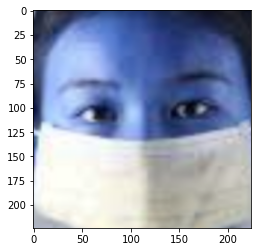

[[1. 0.]]


In [0]:
img = cv2.imread("/content/CROPPED_train/withmask_cropped/withmask3.png")
img  = cv2.resize(img,(224,224))
plt.imshow(img)
plt.show()
y= model.predict(img[np.newaxis,...])
print(y)

In [0]:
model.save("/content/drive/My Drive/vgg_mask.h5")